In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
!pip install yfinance

In [35]:
import yfinance as yf

start = '2010-01-01'
end = '2024-01-31'

ticker = yf.Ticker('AAPL')
df = ticker.history(start=start, end=end)

print(df.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.453205  6.485557  6.421457  6.470741  493729600   
2010-01-05 00:00:00-05:00  6.488580  6.518513  6.447761  6.481928  601904800   
2010-01-06 00:00:00-05:00  6.481930  6.507630  6.372174  6.378826  552160000   
2010-01-07 00:00:00-05:00  6.402408  6.409967  6.320772  6.367032  477131200   
2010-01-08 00:00:00-05:00  6.358565  6.409966  6.321074  6.409361  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [36]:
print(df.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2024-01-24 00:00:00-05:00  195.170947  196.129730  194.092321  194.252121   
2024-01-25 00:00:00-05:00  194.971211  196.019876  192.863900  193.922546   
2024-01-26 00:00:00-05:00  194.022423  194.511788  191.695390  192.174774   
2024-01-29 00:00:00-05:00  191.765299  191.955059  189.338403  191.485657   
2024-01-30 00:00:00-05:00  190.696667  191.555572  187.231088  187.800354   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-01-24 00:00:00-05:00  53631300        0.0           0.0  
2024-01-25 00:00:00-05:00  54822100        0.0           0.0  
2024-01-26 00:00:00-05:00  44594000        0.0           0.0  
2024-01-29 00:00:00-05:00  47145600        0.0           0.0  
2024-01-30 00:00:00-05:00  55859400        0.0           0.0  


In [38]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.453205,6.485557,6.421457,6.470741,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.488580,6.518513,6.447761,6.481928,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.481930,6.507630,6.372174,6.378826,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.402408,6.409967,6.320772,6.367032,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.358565,6.409966,6.321074,6.409361,447610800,0.0,0.0


In [41]:
df = df.drop(['Date', 'Dividends', 'Stock Splits'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,6.453205,6.485557,6.421457,6.470741,493729600
1,6.488580,6.518513,6.447761,6.481928,601904800
2,6.481930,6.507630,6.372174,6.378826,552160000
3,6.402408,6.409967,6.320772,6.367032,477131200
4,6.358565,6.409966,6.321074,6.409361,447610800


In [42]:
df

,Open,High,Low,Close,Volume
0,6.453205,6.485557,6.421457,6.470741,493729600
1,6.488580,6.518513,6.447761,6.481928,601904800
2,6.481930,6.507630,6.372174,6.378826,552160000
3,6.402408,6.409967,6.320772,6.367032,477131200
4,6.358565,6.409966,6.321074,6.409361,447610800
...,...,...,...,...,...
3537,195.170947,196.129730,194.092321,194.252121,53631300
3538,194.971211,196.019876,192.863900,193.922546,54822100
3539,194.022423,194.511788,191.695390,192.174774,44594000
3540,191.765299,191.955059,189.338403,191.485657,47145600


In [43]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3537    183.167358
3538    183.232746
3539    183.264798
3540    183.287565
3541    183.341203
Name: Close, Length: 3542, dtype: float64

In [45]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3537    181.062443
3538    181.226207
3539    181.387350
3540    181.548528
3541    181.664125
Name: Close, Length: 3542, dtype: float64

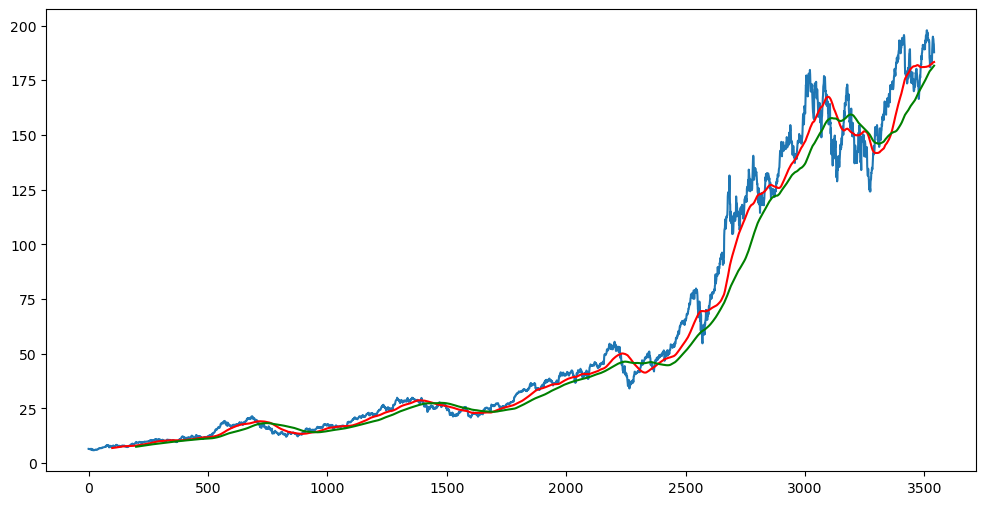

In [46]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [47]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2479, 1)
(1063, 1)


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [49]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01172234],
       [0.01191983],
       [0.0100996 ],
       ...,
       [1.        ],
       [0.99841599],
       [0.99888681]])

In [50]:
data_training_array.shape

(2479, 1)

In [52]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
# ML Starts

In [54]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [57]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

75/75 [==============================] - 26s 228ms/step - loss: 0.0394
Epoch 2/50
75/75 [==============================] - 17s 227ms/step - loss: 0.0066
Epoch 3/50
75/75 [==============================] - 17s 223ms/step - loss: 0.0058
Epoch 4/50
75/75 [==============================] - 17s 224ms/step - loss: 0.0049
Epoch 5/50
75/75 [==============================] - 17s 223ms/step - loss: 0.0047
Epoch 6/50
75/75 [==============================] - 17s 225ms/step - loss: 0.0044
Epoch 7/50
75/75 [==============================] - 17s 225ms/step - loss: 0.0042
Epoch 8/50
75/75 [==============================] - 17s 224ms/step - loss: 0.0043
Epoch 9/50
75/75 [==============================] - 17s 226ms/step - loss: 0.0042
Epoch 10/50
75/75 [==============================] - 17s 225ms/step - loss: 0.0034
Epoch 11/50
75/75 [==============================] - 17s 225ms/step - loss: 0.0035
Epoch 12/50
75/75 [==============================] - 17s 225ms/step - loss: 0.0035
Epoch 13/50

In [58]:
model.save('keras_model.h5')

C:\Users\amrendra\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
data_testing.head()

,Close
2479,63.105732
2480,63.278431
2481,63.779530
2482,63.721149
2483,64.331696


In [66]:
data_training.tail(100)

,Close
2379,47.945827
2380,47.805695
2381,48.189842
2382,48.025566
2383,47.977234
...,...
2474,60.329147
2475,62.041348
2476,62.448769
2477,62.359047


In [59]:
past_100_days = data_training.tail(100)

In [61]:
dir(past_100_days)

['Close',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__r

In [63]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [64]:
print(final_df)

           Close
0      47.945827
1      47.805695
2      48.189842
3      48.025566
4      47.977234
...          ...
1158  194.252121
1159  193.922546
1160  192.174774
1161  191.485657
1162  187.800354

[1163 rows x 1 columns]


In [67]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00816815],
       [0.00724101],
       [0.00978257],
       ...,
       [0.96240229],
       [0.95784301],
       [0.93346066]])

In [68]:
input_data.shape

(1163, 1)

In [69]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [70]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1063, 100, 1)
(1063,)


In [71]:
# Making Predictions

y_predicted = model.predict(x_test)

34/34 [==============================] - 4s 82ms/step


In [72]:
y_predicted.shape

(1063, 1)

In [73]:
y_test

array([0.1084677 , 0.10961029, 0.11292561, ..., 0.96240229, 0.95784301,
       0.93346066])

In [74]:
y_predicted

array([[0.16157946],
       [0.16342051],
       [0.16534717],
       ...,
       [0.87317574],
       [0.88578033],
       [0.8974973 ]], dtype=float32)

In [75]:
scaler.scale_

array([0.00661611])

In [76]:
scale_factor = 1/0.00661611
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

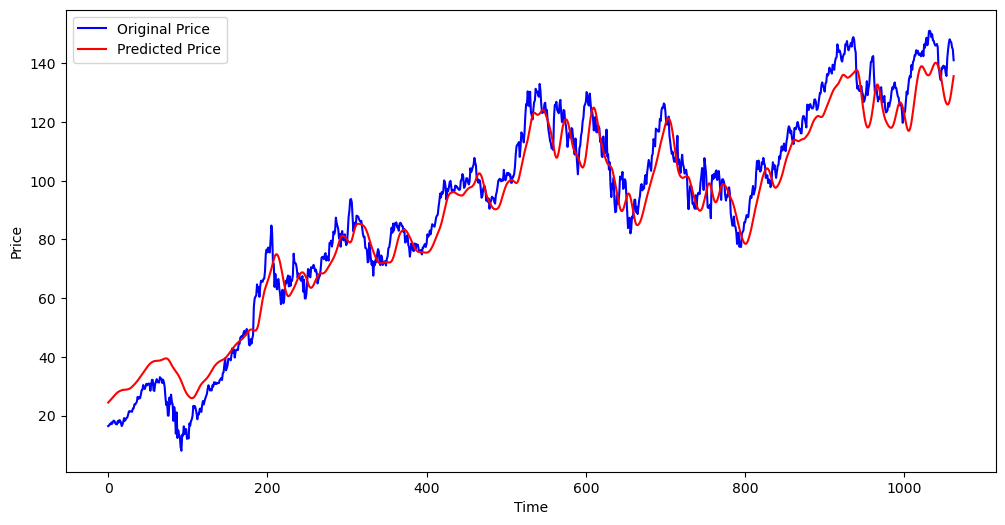

In [77]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()